In [15]:
import pandas as pd
import numpy as np
import NDCG as ndcg
import MHR as mhr
import sys
import types
ndcg.reload_package(mhr)
from sklearn.svm import SVR, LinearSVR
from sklearn.grid_search import GridSearchCV
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer
from time import time
import matplotlib.pyplot as plt 
%matplotlib inline

loading MHR


In [23]:
data = pd.read_csv("data/parameters_estimation.csv")
#datas=
#maxv=data.ndcg_mean.max()
#datas


24

In [9]:
reviews_features = pd.read_csv('data/eletronic_sample_counts.csv.gz')
df_agg = reviews_features[['word_count','asin']].groupby(['asin']).agg(['count','mean'])
#df_agg['word_count'].sort_values('count',ascending=False).head(10)

len(df_agg)

383

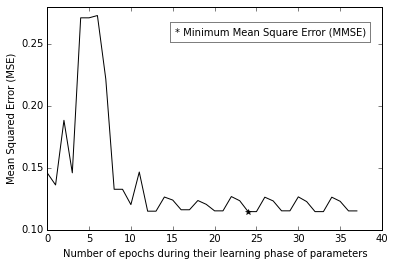

In [37]:

#while True:
#    sleep(00.5)
#    print "ok"
data = pd.read_csv("data/parameters_estimation.csv")
#print data
fig,ax = plt.subplots()
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_xlabel('Number of epochs during the learning phase of parameters')
#ax.set_title('Parameter Estimation')

plt.plot(1-data.as_matrix()[:38,3], color='Black')

plt.plot(np.argmax(data.ndcg_mean.values), 1-np.max(data.ndcg_mean.values), color='k', marker='*', markeredgecolor='k')

#plt.figtext(0.80, 0.5, '*', color='k', backgroundcolor='gray',
#             weight='roman', size='medium')
plt.figtext(0.42, 0.8, '* Minimum Mean Square Error (MMSE)', color='black', weight='roman',
             size='medium', bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})



plt.show()

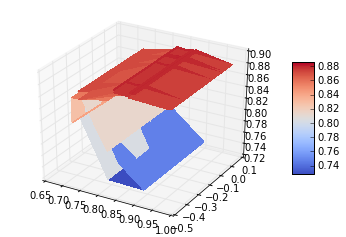

In [183]:
data = pd.read_csv("data/parameters_estimation.csv")

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

X = data['alpha'].values
Y = data['beta'].values
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
#Z = np.sin(data['ndcg_mean'].values)
Z = data['ndcg_mean'].values
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



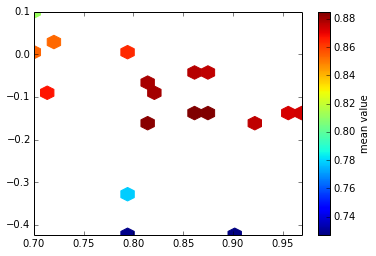

In [184]:
data = pd.read_csv("data/parameters_estimation.csv")

from matplotlib import pyplot as PLT
from matplotlib import cm as CM
from matplotlib import mlab as ML
import numpy as NP

x = data['alpha'].values
y = data['beta'].values

z = data['ndcg_mean'].values


gridsize=20
PLT.subplot(111)

# if 'bins=None', then color of each hexagon corresponds directly to its count
# 'C' is optional--it maps values to x-y coordinates; if 'C' is None (default) then 
# the result is a pure 2D histogram 

PLT.hexbin(x, y, C=z, gridsize=gridsize, cmap=CM.jet, bins=None)
PLT.axis([x.min(), x.max(), y.min(), y.max()])

cb = PLT.colorbar()
cb.set_label('mean value')
PLT.show()   